<a href="https://colab.research.google.com/github/MarkLee7925/Bank-Stock-Prices-Prediction/blob/main/Scotiabank_StockPricesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scotiabank - Stock Prices Prediction

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_datareader as webreader
import pandas as pd
import tensorflow as tf
import seaborn as sns
import datetime as dt
import pandas_datareader as webreader
from datetime import date, timedelta, datetime

## 2. Load Data

In [2]:
# Import dataset
df = pd.read_csv('Scotiabank_StockPrices_2016-2021.csv')

# today = date.today()
# date_today = today.strftime("%Y-%m-%d")
# date_start = '2016-01-01'

# # # Read stock quotes from Yahoo Finance
# df = webreader.DataReader('BNS.TO', data_source='yahoo', start=date_start, end=date_today)

# Input data of np array - Closing price
dataset = df.iloc[:, 4:5].values

print(dataset.shape)

(1254, 1)


In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-13,69.010002,69.209999,68.269997,68.639999,54.137894,1825000
1,2016-09-14,68.550003,69.320000,68.410004,68.879997,54.327187,1275000
2,2016-09-15,69.029999,70.139999,69.029999,70.059998,55.257874,1490700
3,2016-09-16,70.059998,70.129997,69.559998,69.900002,55.131676,4076200
4,2016-09-19,70.089996,70.699997,69.809998,70.000000,55.210552,1571900
...,...,...,...,...,...,...,...
1249,2021-09-03,78.320000,78.370003,78.019997,78.120003,78.120003,1880900
1250,2021-09-07,78.370003,78.769997,78.110001,78.150002,78.150002,4105100
1251,2021-09-08,78.190002,78.459999,77.959999,78.059998,78.059998,1594600
1252,2021-09-09,78.050003,78.489998,77.930000,78.150002,78.150002,1897200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1254 non-null   object 
 1   Open       1254 non-null   float64
 2   High       1254 non-null   float64
 3   Low        1254 non-null   float64
 4   Close      1254 non-null   float64
 5   Adj Close  1254 non-null   float64
 6   Volume     1254 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.7+ KB


In [5]:
# Check for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imputer.fit_transform(dataset)
# dataset = imputer.transform(dataset)
# df.dropna(inplace=True)

## 3. Visualize Data

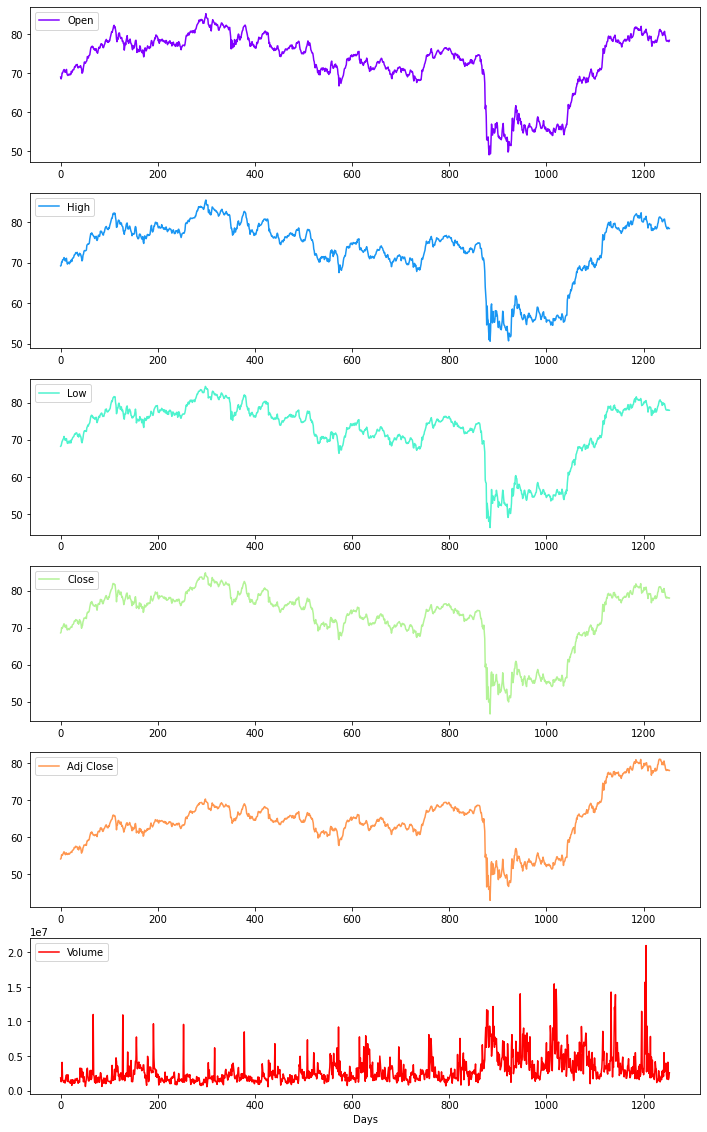

In [7]:
# Plot each data column
fig1 = df.plot(subplots=True, figsize=(12,20), sharex=False, cmap='rainbow')
plt.xlabel('Days')
# fig1.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

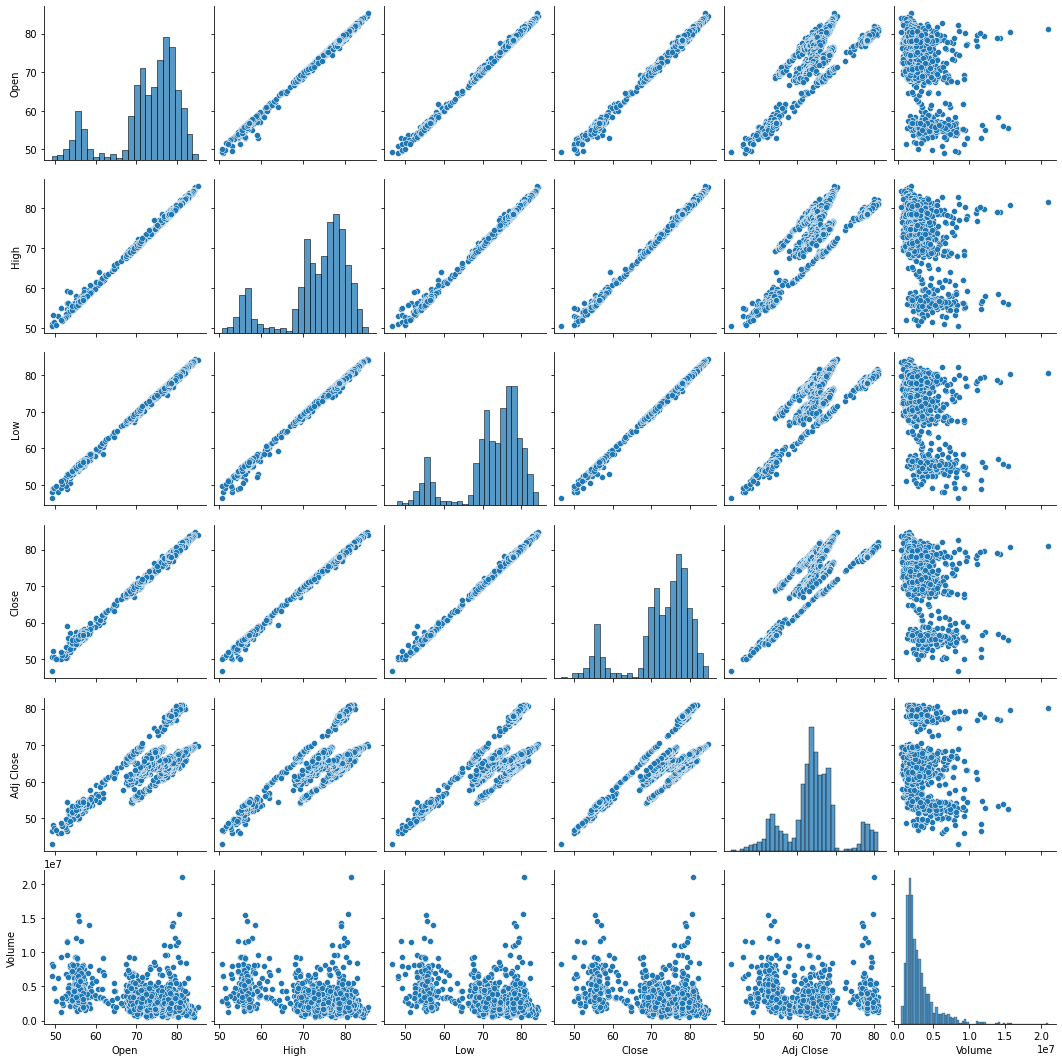

In [8]:
# Pariwise relationship between features
sns.pairplot(df)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

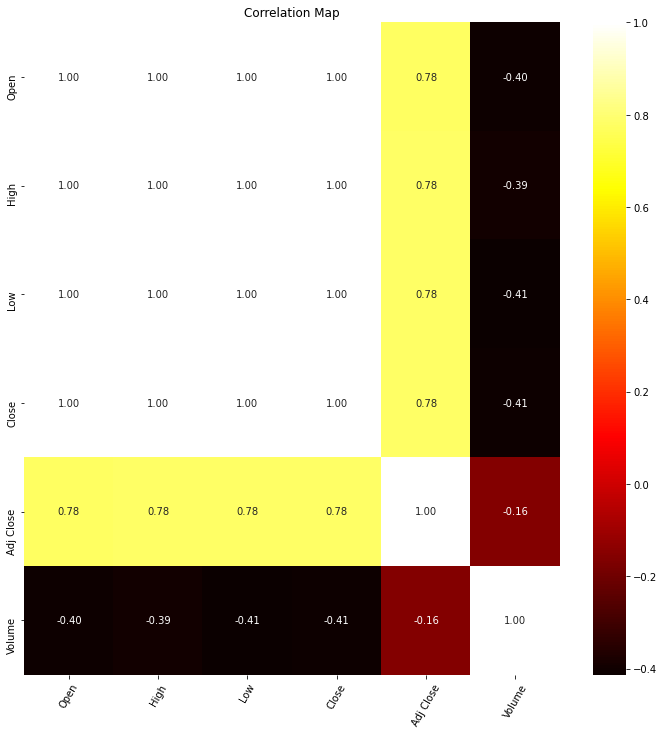

In [9]:
# Correlation Map
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='hot', fmt='.2f')
plt.title('Correlation Map')
plt.xticks(rotation=60)

## 4. Data Preprocessing and Feature Engineering

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Normalize data
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(dataset)

In [12]:
dataset_scaled

array([[0.57457397],
       [0.58086487],
       [0.61179543],
       ...,
       [0.82149398],
       [0.82385319],
       [0.82123199]])

In [13]:
# Split dataset into training set and test set (80/20 split)
training_size = int(len(df)*0.8)
dataset_train = dataset_scaled[:training_size]
dataset_test = dataset_scaled[training_size:]

print('Training set shape: ' + str(dataset_train.shape))
print('Test set shape: ' + str(dataset_test.shape))

Training set shape: (1003, 1)
Test set shape: (251, 1)


In [14]:
# Predict stock price results using 60 timesteps (60 business days)
timesteps = 60

def define_training_data(timesteps, dataset):
  # X - number of timesteps, y - indicators (features) used for training
  X, y = [], []
  for i in range(timesteps, dataset.shape[0]):
    X.append(dataset[i-timesteps:i, 0])
    y.append(dataset[i, 0])
  X, y = np.array(X), np.array(y)
  return X, y

X_train, y_train = define_training_data(timesteps, dataset_train)
print(X_train.shape, y_train.shape)

(943, 60) (943,)


In [15]:
# Reshape(number of rows, number of timesteps (columns), number of predictors)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
X_train

array([[[0.57457397],
        [0.58086487],
        [0.61179543],
        ...,
        [0.72477066],
        [0.72267362],
        [0.7328964 ]],

       [[0.58086487],
        [0.61179543],
        [0.60760157],
        ...,
        [0.72267362],
        [0.7328964 ],
        [0.75701168]],

       [[0.61179543],
        [0.60760157],
        [0.61022275],
        ...,
        [0.7328964 ],
        [0.75701168],
        [0.7719527 ]],

       ...,

       [[0.27889907],
        [0.30904316],
        [0.30065524],
        ...,
        [0.24010484],
        [0.22463957],
        [0.22595016]],

       [[0.30904316],
        [0.30065524],
        [0.31533416],
        ...,
        [0.22463957],
        [0.22595016],
        [0.21310607]],

       [[0.30065524],
        [0.31533416],
        [0.30642198],
        ...,
        [0.22595016],
        [0.21310607],
        [0.22857136]]])

In [17]:
X_train.shape

(943, 60, 1)

## 5. Define LSTM model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Epoch 1/100
30/30 [==============================] - 10s 122ms/step - loss: 0.0795
Epoch 2/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0116
Epoch 3/100
30/30 [==============================] - 4s 125ms/step - loss: 0.0081
Epoch 4/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0079
Epoch 5/100
30/30 [==============================] - 4s 124ms/step - loss: 0.0073
Epoch 6/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0073
Epoch 7/100
30/30 [==============================] - 4s 122ms/step - loss: 0.0068
Epoch 8/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0069
Epoch 9/100
30/30 [==============================] - 4s 121ms/step - loss: 0.0059
Epoch 10/100
30/30 [==============================] - 4s 122ms/step - loss: 0.0066
Epoch 11/100
30/30 [==============================] - 4s 124ms/step - loss: 0.0058
Epoch 12/100
30/30 [==============================] - 4s 123ms/step - loss: 0.0061
Epoch 13/100

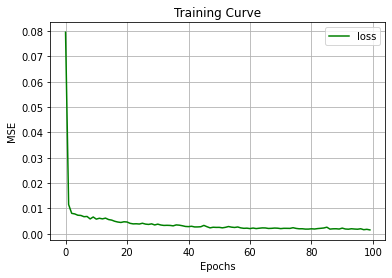

In [29]:
# Define model
reg = Sequential()

# LSTM layers
reg.add(LSTM(units=60, return_sequences=True, 
             input_shape=(X_train.shape[1], X_train.shape[2])))
reg.add(Dropout(0.1))
reg.add(LSTM(units=60, return_sequences=True))
reg.add(Dropout(0.1))
reg.add(LSTM(units=60, return_sequences=True))
reg.add(Dropout(0.1))
reg.add(LSTM(units=60, return_sequences=False))
reg.add(Dropout(0.1))

# Output layer
reg.add(Dense(units=X_train.shape[2]))

# Compile model
reg.compile(optimizer='adam', loss='mean_squared_error')

# Train (fit) model
history = reg.fit(X_train, y_train, batch_size=32, epochs=100)

# Plot loss during training
plt.plot(history.history['loss'], 'g', label='loss')
plt.title('Training Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

## 6. Evalutate model

#### Make predictions

In [30]:
# Get 60 previous stock prices for predicting
inputs = dataset[len(dataset)-len(dataset_test) - timesteps:]
# Reshape input values
inputs = inputs.reshape(-1, 1)
# Scale input values, directly apply transformations (already fitted)
inputs = sc.transform(inputs)

# Define test set structure
X_test = []
# For the entire test set
for i in range(timesteps, timesteps + len(dataset_test)):
  # Range of values from i-60 to i, first column
  X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

# Obtain 3D structure of the test set
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Predict the test set results
predicted_stock_price = reg.predict(X_test)
# Apply inverse transformations
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(dataset_test)

# Print predicted and real stock prices side-by-side
print(np.concatenate((predicted_stock_price.reshape(len(predicted_stock_price), 1), 
                      real_stock_price.reshape(len(real_stock_price), 1)), 1 ))

# Print Scores
print('')
print('--- Prediction Scores ---')
print('')
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: ' + str(mae))
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: ' + str(mse))
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+ str(rmse))
r2 = r2_score(real_stock_price, predicted_stock_price)
print('R^2 Score: '+ str(r2))

[[54.88497543 55.380001  ]
 [54.92935181 55.32      ]
 [55.06192398 55.529999  ]
 [55.24382019 55.07      ]
 [55.37004089 55.18      ]
 [55.41566849 55.150002  ]
 [55.39429092 54.580002  ]
 [55.26322556 54.310001  ]
 [55.01633072 54.130001  ]
 [54.69577789 54.209999  ]
 [54.39102173 54.459999  ]
 [54.20146942 55.970001  ]
 [54.34076691 55.439999  ]
 [54.71472931 55.32      ]
 [55.13027191 55.389999  ]
 [55.45759201 56.09      ]
 [55.73200989 55.799999  ]
 [55.92361832 55.950001  ]
 [56.0324707  56.669998  ]
 [56.1605835  56.740002  ]
 [56.33363342 56.43      ]
 [56.47191238 56.169998  ]
 [56.49354935 55.849998  ]
 [56.35787201 56.119999  ]
 [56.15436172 56.18      ]
 [55.97794724 55.759998  ]
 [55.81890488 55.580002  ]
 [55.65744781 55.630001  ]
 [55.5171051  56.389999  ]
 [55.52638626 57.18      ]
 [55.79990768 56.66      ]
 [56.18971252 55.75      ]
 [56.41652679 54.279999  ]
 [56.2053566  55.209999  ]
 [55.75123215 55.349998  ]
 [55.30841446 55.59      ]
 [55.05278015 56.32      ]
 

#### Visualize Results

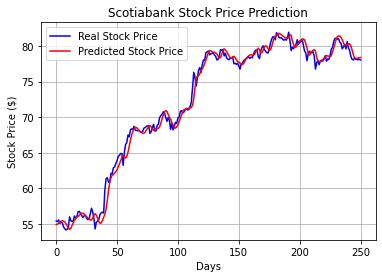

In [31]:
# Plot predicted and real closing stock prices
plt.plot(real_stock_price, color = 'blue', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.title('Scotiabank Stock Price Prediction')
plt.legend()
plt.grid()
plt.show()